In [183]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.optimize

<h1> Part 1. One-dimensional direct methods of unconstrained nonlinear optimization <h1>

In [184]:
def Cube(x):
    return x**3 +2

def Abs(x):
    return abs(x-0.2)

def Sin(x):
    return x * np.sin(1 / x)

In [185]:
#Define methods for 1 variable

def Search( f, a, b, epsilon ):
    n = round((b - a) / epsilon ) + 1
    xk = []
    f_xk = []
    xk.insert(0, a)
    f_xk.insert(0, f(a))
    for i in range(n):
        xk.append( a + (i + 1) * ((b -a ) / n))
        f_xk.insert(i+1, f(xk[i+1]))
    return xk[(f_xk.index(min(f_xk)))]

def Dichotomy(f, a, b, epsilon):
    ak = a
    bk = b
    x_roof = a
    delta = epsilon - (epsilon / 2)
    action = 0
    iters = 0
    calls = 1
    while abs(ak - bk) > epsilon:
        x1 = (ak + bk - delta) / 2 
        x2 = (ak + bk + delta) / 2 
        action +=2 # Two values of x
        if f(x1) <= f(x2):
            ak = ak
            bk = x2
            x_roof = x1
            
        else: 
            ak = x1
            bk = bk
            x_roof = x2
        action +=4 # Two new values of x and f(x) for them
        iters +=1
        calls +=1
    return x_roof, action, iters, calls
            

def GoldenRatio(f, a, b, epsilon):
    ak = a
    bk = b
    x_roof = a
    x1 = a + (3 - 5**0.5)/2 * (b - a)
    x2 = b + (5**0.5 - 3)/2 * (b - a)
    iters = 0
    calls = 1
    action = 2
    #print (abs(ak-bk))
    while abs(ak - bk) > epsilon:
        if f(x1) <= f(x2):
            bk = x2
            x2 = x1
            x1 = ak + (3 - 5**0.5)/2 * (bk - ak)
            x_roof = x1
        else: 
            ak = x1
            x1 = x2
            x2 = bk + (5**0.5 - 3)/2 * (bk - ak)
            x_roof = x2
        iters +=1
        calls +=1
    return x_roof, iters, action


In [186]:
mod = GoldenRatio(Abs, 0, 1, 0.001)
print ('Arg min |x-0.2| on [0,1] = {:.6f}, it took {}, iterations and  {} actions was made for  this incoming parameters'.format(*GoldenRatio(Abs, 0, 1, 0.001)))



Arg min |x-0.2| on [0,1] = 0.200160, it took 15, iterations and  2 actions was made for  this incoming parameters


<h1> Part 2. Multi-dimensional direct methods of unconstrained nonlinear optimization <h1>

In [187]:
np.random.seed(42)
alpha = np.random.random()
beta = np.random.random()
xk = []
yk = []
k = 100
for i in range (k+1):
    xk.append(i/k)
    yk.append( alpha * xk[i] + beta + np.random.randn())
xk = np.asarray(xk)
yk = np.asarray(yk)

In [189]:
def LnrApprox(x, a, b):
    return a * x + b

def RatioApprox(x, a, b):
    return a / (1+b*x)

In [190]:
def OptiCostLin(params, real, x):
    a, b = params
    error =  sum((real - LnrApprox(x, a, b))**2) 
    return error
def OptiCostRatio(params, real, x ):
    a, b = params 
    error = sum((real - RatioApprox(x, a, b))**2)
    return error

In [191]:
Lin_search = scipy.optimize.brute(OptiCostLin, [[0, 1], [0, 1]], args=(yk, xk), Ns=int(1/0.001) + 1)
Lin_Nelder_Mead = scipy.optimize.minimize(OptiCostLin, x0 = [0, 0], args=(yk, xk ), tol=0.001, method='Nelder-Mead')
Lin_Gauss = scipy.optimize.minimize(OptiCostLin, x0 = [1, 1], args=(yk, xk), tol=0.001, method='Powell')
print ('Pararms by Searc method  for Linear approx',  Lin_search)
print ('Pararms by Gauss method for Linear approx \n',  Lin_Gauss)
print ('Pararms by Nelder-Mead method for Linear approx \n',  Lin_Nelder_Mead)


Pararms by Searc method  for Linear approx [0.43875128 0.79067613]
Pararms by Gauss method for Linear approx 
    direc: array([[ 0.        ,  1.        ],
       [ 0.23317346, -0.11658673]])
     fun: 83.07382697914977
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 3
  status: 0
 success: True
       x: array([0.43877712, 0.79065688])
Pararms by Nelder-Mead method for Linear approx 
  final_simplex: (array([[0.43917899, 0.79064992],
       [0.43818416, 0.79145594],
       [0.43821877, 0.7904227 ]]), array([83.07383217, 83.07385551, 83.07385627]))
           fun: 83.0738321661276
       message: 'Optimization terminated successfully.'
          nfev: 109
           nit: 56
        status: 0
       success: True
             x: array([0.43917899, 0.79064992])


In [192]:
Ratio_search = scipy.optimize.brute(OptiCostRatio, [[0, 1], [0, 1]], args=(yk, xk), Ns=int(1/0.001) + 1)
Ratio_Nelder_Mead = scipy.optimize.minimize(OptiCostRatio, x0 = [0, 0], args=(yk, xk), tol=0.001, method='Nelder-Mead')
Ratio_Gauss = scipy.optimize.minimize(OptiCostRatio, x0 = [1, 1], args=(yk, xk), tol=0.001, method='Powell')
print ('Pararms by Searc method for Rational approx',  Ratio_search)
print ('Pararms by Gauss method for Rational approx \n',  Ratio_Gauss)
print ('Pararms by Nelder-Mead method for Rational approx\n',  Ratio_Nelder_Mead)


Pararms by Searc method for Rational approx [ 0.83264517 -0.33003319]
Pararms by Gauss method for Rational approx 
    direc: array([[-0.23968794, -0.44995249],
       [-0.03042684, -0.01371012]])
     fun: 83.16368036006268
 message: 'Optimization terminated successfully.'
    nfev: 120
     nit: 5
  status: 0
 success: True
       x: array([ 0.83266542, -0.33000023])
Pararms by Nelder-Mead method for Rational approx
  final_simplex: (array([[ 0.83269176, -0.32982078],
       [ 0.83221026, -0.33047843],
       [ 0.83288178, -0.33008045]]), array([83.16368226, 83.16368912, 83.16369114]))
           fun: 83.16368226279701
       message: 'Optimization terminated successfully.'
          nfev: 106
           nit: 55
        status: 0
       success: True
             x: array([ 0.83269176, -0.32982078])


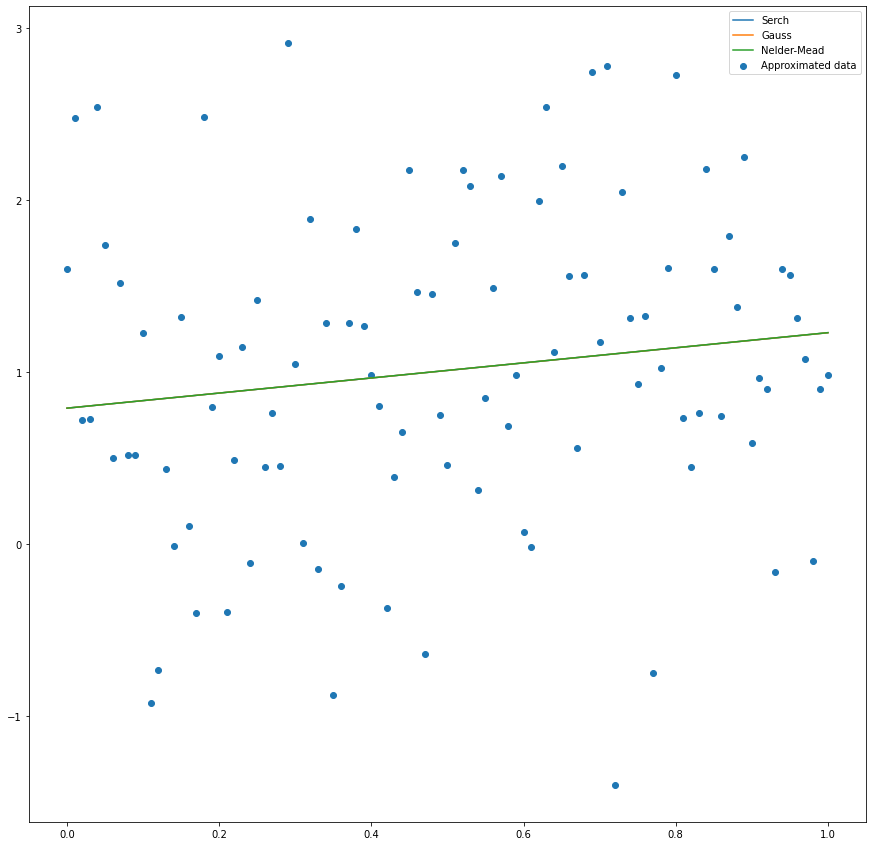

In [193]:
plt.figure(figsize = (15, 15))
plt.scatter(xk, yk)
plt.plot(xk, LnrApprox(xk, Lin_search[0], Lin_search[1]))
plt.plot(xk, LnrApprox(xk, Lin_Gauss.x[0], Lin_Gauss.x[1]))
plt.plot(xk, LnrApprox(xk, Lin_Nelder_Mead.x[0], Lin_Nelder_Mead.x[1]))
plt.legend(['Serch', 'Gauss', 'Nelder-Mead', 'Approximated data'])

plt.show()

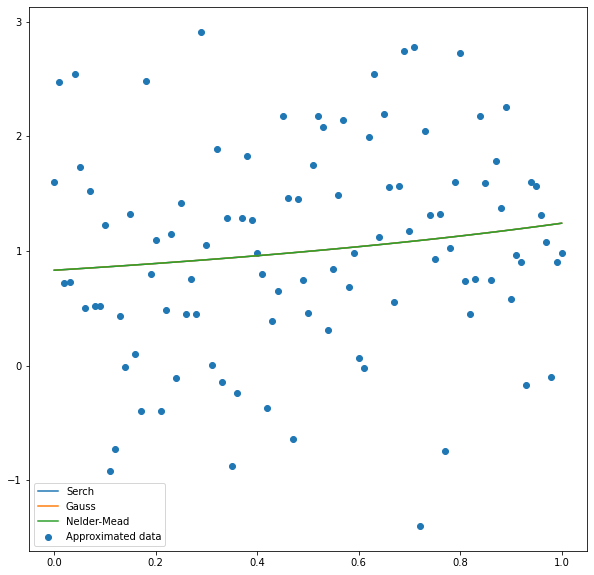

In [194]:
plt.figure(figsize = (10, 10))
plt.scatter(xk, yk)
plt.plot(xk, RatioApprox(xk, Ratio_search[0], Ratio_search[1]))
plt.plot(xk, RatioApprox(xk, Ratio_Gauss.x[0], Ratio_Gauss.x[1]))
plt.plot(xk, RatioApprox(xk, Ratio_Nelder_Mead.x[0], Ratio_Nelder_Mead.x[1]))
plt.legend(['Serch', 'Gauss', 'Nelder-Mead', 'Approximated data'])

plt.show()